In [ ]:
# Last amended: 04th March, 2021
# Data source: Kaggle: https://www.kaggle.com/fayomi/advertising
#
# Spyder note: Use F9 in Spyder to execute a line and advance
#
# objectives:
#           Discover relationships and existence of pattern
#           in data
#              i)  Feature Engineering for categorical variables
#             ii)  Extracting datetime components
#             iii) Behaviour of 'apply' vs 'map' for Series
#              iv)  Learning to draw various types of graphs
#               v)  Conditional plots using catplot
#              vi)  Relationship plots using relplot
#             vii)  Learning seaborn plots
#            viii)  Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves
# Good reference: https://seaborn.pydata.org/introduction.html
#Created by: Ashok Harnal Sir


In [ ]:

# 1.0 Call libraries
#%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
# 1.2 For plotting
import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib as mpl     # For creating colormaps
import seaborn as sns
# 1.3 For data processing
from sklearn.preprocessing import StandardScaler
# 1.4 OS related
import os

# 1.5
#%matplotlib qt5
%matplotlib inline


In [ ]:
# 1.6 Display outputs of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#ad = pd.read_csv("C:Users//user//Desktop//FORE Documents//Courses//Big Data Analytics for Managers (Python)//Session 7-9//Data Visualization class practice exercise//advertising.csv", parse_dates = ['Timestamp'])

IOError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4daTItr5K86EYVYmvi9VIhz8taZHuZRVErVxKqiBPUjREObn4O14w
Mounted at /content/drive/


In [ ]:
ad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/advertising.csv", parse_dates = ['Timestamp'])

In [ ]:
# 1.8 Check data types of attributes
ad.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

In [ ]:
# 1.9 Distribution of data types
ad.dtypes.value_counts()

float64           3
int64             3
object            3
datetime64[ns]    1
dtype: int64

In [ ]:
# 1.10 Some more dataset related information
pd.options.display.max_columns = 100
pd.set_option("display.max.columns" , 100)

In [ ]:
# 1.11 A little data exploration
ad.head(3)
ad.info()               # Also informs how much memory dataset takes
                        #   and status of nulls
ad.shape                # (1000, 10)
ad.columns.values
len(ad)                 # Also give number of rows


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null datetime64[ns]
Clicked on Ad               1000 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


(1000, 10)

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

1000

In [ ]:
# 2.0 Rename few column names:
new_col_names  = {
                 'Daily Time Spent on Site' :  'DailyTimeSpentonSite',
                 'Area Income'              :  'AreaIncome',
                 'Daily Internet Usage'     :  'DailyInternetUsage',
                 'Clicked on Ad'            :  'Clicked_on_ad',
                 'Male'                     :  'Gender',
                 'Ad Topic Line'            :  'AdTopicLine'
                }
# 2.1
ad.rename(
         columns = new_col_names,
         inplace = True,
         #axis = 1             # Note the axis keyword. By default it is axis = 0
         )

# 2.2
ad.head(3)
ad.columns.values

# 2.3 Write to CSV
ad.to_csv('ad_mod.csv', index=False)
%pwd

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


array(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'AdTopicLine', 'City', 'Gender', 'Country', 'Timestamp',
       'Clicked_on_ad'], dtype=object)

u'/content'

### Categorical data

#### Examine Categorical data

In [ ]:
# 3.0 Categorical data value counts
#     Or number of levels per category

len(ad.City.unique())                   # 969 cities out of 1000
ad.City.value_counts()
#ad.City.unique()

969

Lisamouth              3
Williamsport           3
Lake James             2
Millerbury             2
West Steven            2
West Shannon           2
Shelbyport             2
Wrightburgh            2
Millertown             2
New Jessicaport        2
Michelleside           2
Lake Susan             2
Johnstad               2
Robertfurt             2
West Amanda            2
New Sheila             2
Joneston               2
Benjaminchester        2
East John              2
Port Julie             2
Lake Patrick           2
East Timothy           2
North Daniel           2
Port Jason             2
Lake Jose              2
South Lisa             2
Port Juan              2
Pamelamouth            2
Lake David             2
Lake Annashire         1
                      ..
New Nancy              1
Turnerchester          1
Lauraburgh             1
Coxhaven               1
Hollyfurt              1
Claytonside            1
New Rachel             1
West Tinashire         1
West Tanner            1


In [ ]:
# 3.1 How many conutries
len(ad.Country.unique())                # 237 countries
ad.Country.value_counts()               # Mostly 2 per countryt

237

Czech Republic                                         9
France                                                 9
Micronesia                                             8
Afghanistan                                            8
Turkey                                                 8
Senegal                                                8
Peru                                                   8
Cyprus                                                 8
Australia                                              8
South Africa                                           8
Liberia                                                8
Greece                                                 8
Luxembourg                                             7
Eritrea                                                7
Venezuela                                              7
Albania                                                7
Fiji                                                   7
Taiwan                         

Seaborn Countplot  
Show the counts of observations in each categorical bin using bars.  

> `seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)`

In [ ]:
# 3.2 Distribution of gender
ad['Gender'].value_counts()                  # 519:481
                                             # 1 : Female
                                             # 0 : Male 


0    519
1    481
Name: Gender, dtype: int64

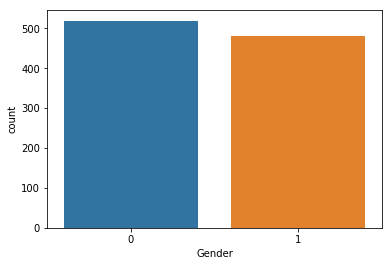

In [ ]:
# 3.2 Distribution of gender, graphically:

_= sns.countplot(x = 'Gender', data = ad)

In [ ]:
# 3.3 Distribution of clicks:

ad['Clicked_on_ad'].value_counts()      # 1 and 0 in the ratio of 500:500
                                        # This is highly optimistic. Genrally clicks may be 1%


1    500
0    500
Name: Clicked_on_ad, dtype: int64

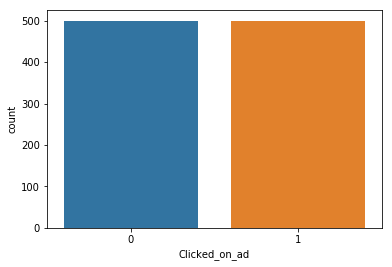

In [ ]:
# 3.3 Distribution of clicks, graphically:

_= sns.countplot(x = 'Clicked_on_ad', data = ad)

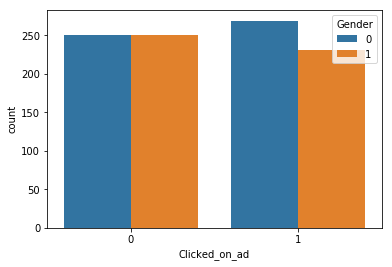

In [ ]:
# 3.4 Distribution of clicks, Gender-wise:

#     Among those who clicked on ad, 
#      males are a little more than females
#       But difference in clicking habits does not appear
#        to be significant

_= sns.countplot(
                  x = 'Clicked_on_ad',   # Countplot
                  hue = 'Gender',        # subset by 'Gender'
                  data = ad
                 )

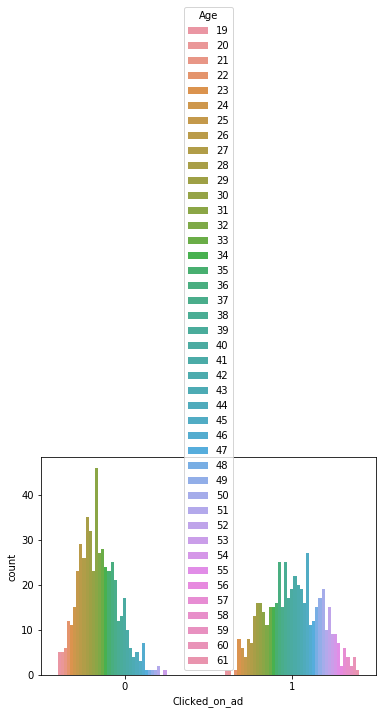

In [ ]:
# 3.4.1 Distribution of clicks, Gender-wise:

#     Among those who clicked on ad, 
#      males are a little more than females
#       But difference in clicking habits does not appear
#        to be significant

_= sns.countplot(
                  x = 'Clicked_on_ad',   # Countplot
                  hue = 'Age',        # subset by 'Gender'
                  data = ad
                 )

#### Cat feature Engineering

In [ ]:
# 4.1 Descretise continuos columns
#     These are equal width bins as against
#     equal data-points bins (quantile) or kmeans clusters
#     Alternatively use KBinsDiscretizer of sklearn

ad["age_cat"] = pd.cut(
                       ad['Age'],
                       bins = 3,           # Else devise your bins: [0,20,60,110]
                       labels= ["y", "m", "s"]
                      )

# 4.1.1
ad.head(2)


,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y


In [ ]:
# 4.2 Bin AreaIncome
ad["area_income_cat"] = pd.cut(
                               ad['AreaIncome'],
                               bins = 3,
                               labels= ["l", "m", "h"]
                               )
# 4.2.1
ad.head(2)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h


In [ ]:
# 4.3 Create a new column as per length of each ad-line
#     Both the following lines do the same thing

ad['AdTopicLineLength'] = ad['AdTopicLine'].apply(lambda x : len(x)) 
ad['AdTopicLineLength'] = ad['AdTopicLine'].map(lambda x : len(x))  

# 4.3.1
ad.head(2)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34


In [ ]:
# 4.3.2 Save your work:
ad.to_csv('ad_mod.csv', index=False)
%pwd

u'/content'

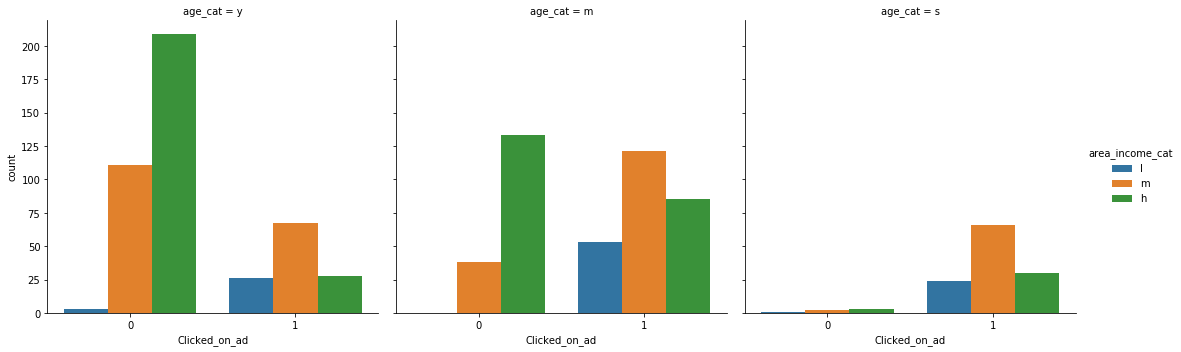

In [ ]:
#4.4 Distribution of clicks, Age wise and area income wise
_=sns.catplot(
               x = 'Clicked_on_ad',
               hue = 'area_income_cat',
               col = 'age_cat',
               kind = 'count',
               data = ad
             )

In [ ]:
## Which ad category? And how many times it occurs?
## INCLUDE THIS IDEA
#fx = ad['Ad Topic Line'].str.split(" ").map(lambda x: x[0])
#vc = fx.value_counts()
#vc[:4]
#ad['ad_cat'] = fx
#ad['ad_cat'].map(vc)

In [ ]:
# 5.0 Extract date components using Series.dt accessor
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties

# 5.1 What is the type of 'dt'
type(ad['Timestamp'].dt)    # Accessor like get()
                            # pandas.core.indexes.accessors.DatetimeProperties

# 5.2 Extract hour, weekday and month
ad['hourOfDay']    = ad['Timestamp'].dt.hour
ad['weekday']      = ad['Timestamp'].dt.weekday
ad['month']        = ad['Timestamp'].dt.month # First we get month. Then we map month to quarter
                                              #   See below

# 5.2.1
ad.head(2)

pandas.core.indexes.accessors.DatetimeProperties

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,hourOfDay,weekday,month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,0,6,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,1,0,4


In [ ]:
# 5.3 Cut hour to morning, evening, night etc
#     For example 0 to 6am is earlymorning

# 5.3.1 For easy interpretation of graphs, use l1
l1 = ["earlymorning", "morning", "afternoon", "evening", "night","latenight"]


# 5.3.2
ad["hourOfDay"] = pd.cut(
                     ad['hourOfDay'],
                     bins = [-1,6,12,17,20,22,24],
                     labels = l1
                     )

# 5.3.3
ad.head(2)

# 5.3.4
ad.to_csv('ad_mod.csv', index=False)
%pwd

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,hourOfDay,weekday,month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,earlymorning,6,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,earlymorning,0,4


u'/content'

In [ ]:

# 5.4 Similarly for weekdays
#     Map weekday numbers to weekday names
#     We use Series.map() method

mymap = {
           0 : 'Monday',
           1 : 'Tuesday',
           2: 'Wednesday',
           3: 'Thursday',
           4: 'Friday',
           5: 'Saturday',
           6: 'Sunday'
         }


# 5.4.1 For easy interpretation of weekdays in graphs
ad['weekday'] = ad['weekday'].map(mymap)

# 5.4.2
ad.head(2)

# 5.4.3
ad.to_csv('ad_mod.csv', index=False)
%pwd

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,hourOfDay,weekday,month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,earlymorning,Sunday,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,earlymorning,Monday,4


u'/content'

In [ ]:
# 5.5 Divide months into qurters

# 5.5.1 For easy interpretation of graphs, use l1
lq = ["quarter1", "quarter2", "quarter3", "quarter4"]


# 5.5.2
ad["quarter"] = pd.cut(
                     ad['month'],
                     bins = [0,3,6,9,12],
                     labels = lq
                     )

# 5.5.3
ad[['month', 'quarter']].head(3)

# 5.5.4
ad.to_csv('ad_mod.csv', index=False)
%pwd

,month,quarter
0,3,quarter1
1,4,quarter2
2,3,quarter1


u'/content'

In [ ]:
# 5.6 So finally what are col names?
ad.columns.values
ad.shape               # (1000, 18)  Earlier shape was (1000, 10)

array(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'AdTopicLine', 'City', 'Gender', 'Country', 'Timestamp',
       'Clicked_on_ad', 'age_cat', 'area_income_cat', 'AdTopicLineLength',
       'hourOfDay', 'weekday', 'month', 'quarter'], dtype=object)

(1000, 17)

In [ ]:
##################
# 6 Plotting
##################
# A summary of syntax of important plots
#---------------------------------------
# 1. sns.displot()
#    (note: sns.distplot() is depreciated)
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# displot(data=None, *, x=None, y=None, hue=None, row=None,
#         col=None, weights=None, kind='hist', rug=False,
#         rug_kws=None, log_scale=None, legend=True, palette=None,
#         hue_order=None, hue_norm=None, color=None, col_wrap=None,
#         row_order=None, col_order=None, height=5, aspect=1, facet_kws=None,
#         **kwargs)
#         kind: 'hist', 'kde', 'ecdf'
###$$$$
# Note: 'displot' DOSES not take 'ax' argument. So if you need to use, 'ax'
#       argument, use: histplot, kdeplot, ecdfplot
###$$$$

# 2. sns.jointplot()
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
# jointplot(x, y, data=None, kind='scatter',
#          stat_func=None, color=None, height=6, ratio=5, space=0.2,
#          dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None,
#          annot_kws=None, **kwargs)
#         kind: { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
#
###$$$$
# Note: 'jointplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: scatterplot, kdelot, histplot, regplot, residplot
###$$$$
#
# 3. sns.replplot()
# https://seaborn.pydata.org/generated/seaborn.relplot.html
# relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None,
#        col=None, col_wrap=None, row_order=None, col_order=None, palette=None,
#        hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None,
#        markers=None, dashes=None, style_order=None, legend='brief', kind='scatter',
#        height=5, aspect=1, facet_kws=None, **kwargs)
#        kind: 'scatter' or 'line'
#
# 4. sns.catplot()
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# catplot(*, x=None, y=None, hue=None, data=None, row=None,col=None, col_wrap=None,
#         estimator=<function mean at 0x7fecadf1cee0>, height=5, aspect=1, orient=None,
#         ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None,
#         row_order=None, col_order=None, kind='strip',sharex=True, sharey=True,
#         color=None, palette=None, legend=True, legend_out=True,
#         margin_titles=False, facet_kws=None, **kwargs )
#         kind:  “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
#
###$$$$
# Note: 'catplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: stripplot, swarmplot, boxplot, violinplot,boxenplot,barplot, countplot
###$$$$
#
# 5. sns.barplot()
#    https://seaborn.pydata.org/generated/seaborn.barplot.html
# barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None,
#         estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000,
#         units=None, seed=None, orient=None, color=None, palette=None,
#         saturation=0.75, errcolor='.26', errwidth=None, capsize=None,
#         dodge=True, ax=None, **kwargs)
#
###$$$$
# Note: For plotting counts of a single cat feature, use 'countplot'
#       For summarising another continuous function, against cat-feature
#       use barplot with estimator of np.sum, np.mean etc
###$$$$
#


In [ ]:
####################################
## Plotting questions that we will answer
####################################
#
## 1 Understand your numeric data
##   How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed?
# Question 3: How is AreaIncome distributed?
# Question 4: Use for loop to draw the distribution plots for the following
#             columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']

# 2.0 Relationship of numeric variable with a categorical variable

# Question 5: How is 'Age' related to clicking?
# Question 6: How is DailyInternetUsage related to clicking?
# Question 7: How is 'AreaIncome' related to clicking?
# Question 8: Draw all the following relationship plots at one go:
#               columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
#               catVar = ['Clicked_on_ad', 'age_cat' ]

# 3.0 Relationship of numeric to numeric variables
#     Using jointplots:

# Question 9:  Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 10: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 11: Show these plots as kernel density as also 'hex' as also
#              draw regression line

# 4.0 Relationship of a categorical to another categorical variable

# Question 12: What relationship exist between 'Clicked_on_ad' and 'Gender'?
# Question 13: What relationship exist between 'DailyTimeSpentonSite' and 'Gender'?
# Question 14: Relationship between Gender and Clicked_on_ad, subset by 'age_cat wise

# 5.0 Relationship between two categorical and one numeric variable

# Question 15: Hour and weekday wise when are clicks most
# Question 16: Quarter wise and weekday wise when are clicks most
# Question 17: Quarter wise and weekday wise when are DailyInternetUsage max and min

# 6.0 Structure in data
# Question 18: Does data exhibit any pattern with respect to 'Clicked_on_ad'
#              Explore how good the patterns are. Stronger patterns will lead
#              to better classifications
#


In [ ]:
###### Start answering questions

In [ ]:
# 7.0.1 Sample data:
#       This step is academic here. But for large datasets,
#       there is a need to sample data before plotting so
#       that they do not crowd limited X-Y space

dn = ad.sample(frac = 0.5)    # Extract 50% sample of data
dn.shape      # (500,20)

(500, 17)

In [ ]:
## Task 1 Understand your numeric data
##         How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed
# Question 3: How is AreaIncome distributed

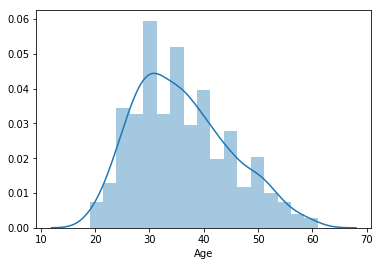

In [ ]:
# 7.1 Age is slight skewed to right. Naturally density of younger
#       persons is high. 
#    Try: kind = 'kde', col = 'Gender', kde = True

_ = sns.distplot(ad['Age'])

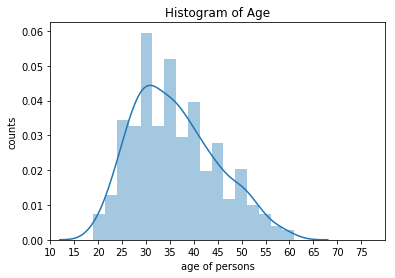

In [ ]:
# 7.1.1 Add more plot configurations
# Refer: https://matplotlib.org/api/axes_api.html#matplotlib-axes
ax= sns.distplot(ad['Age'])

# 7.1.2
_= ax.set( xlim =(10,80),                     #  sns.distplot does not have **kwargs
        xlabel= "age of persons",
        ylabel = "counts",
        title= "Histogram of Age",
        xticks = list(range(0,80,5))
        )


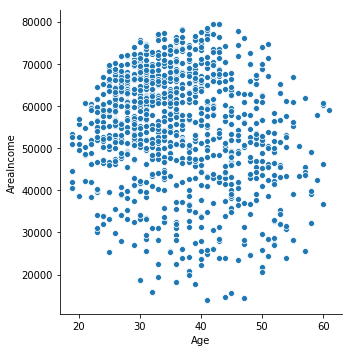

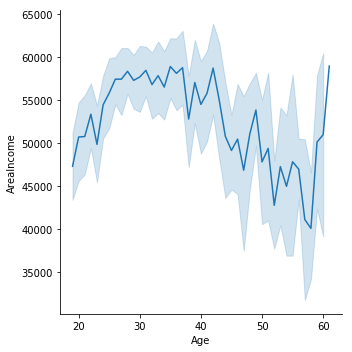

In [ ]:
# 7.1.3 Relationship of Age vs AreaIncome
#       Also try: , kind = 'kde'

#_= sns.distplot(
#               data = ad,
#               x = 'Age',          # Continuous feature
#               y = 'AreaIncome'    # Continuous feature
#              )
sns.relplot(x="Age", y="AreaIncome",  data=ad);
sns.relplot(x="Age", y="AreaIncome", kind = "line", data=ad);

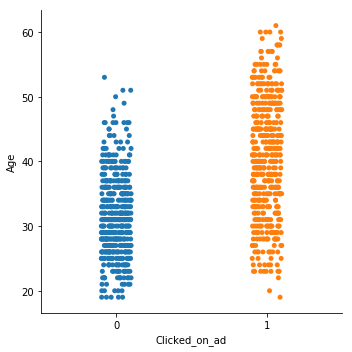

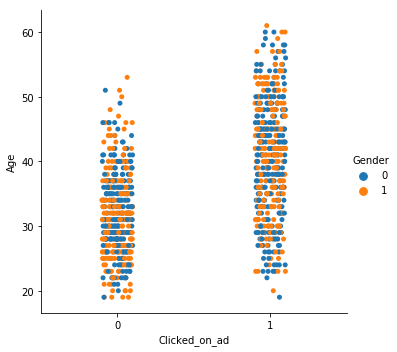

In [ ]:
# 7.1.4 How are clicks distributed as per Age

#_= sns.displot(
#                data = ad,
#                x = 'Age',
#               hue = 'Clicked_on_ad',
#                kind = 'kde'
#               )

sns.catplot(x="Clicked_on_ad", y="Age", data=ad)
sns.catplot(x="Clicked_on_ad", y="Age", hue="Gender", data=ad)

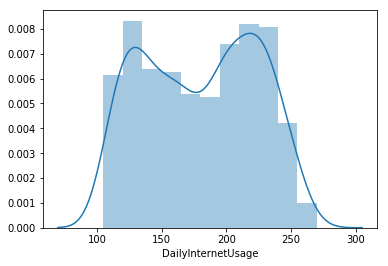

In [ ]:
# 7.1.5 Distribution of DailyTimeSpentonSite
#sns.distplot(ad.DailyTimeSpentonSite)
#sns.distplot(ad.AreaIncome)
sns.distplot(ad.DailyInternetUsage)

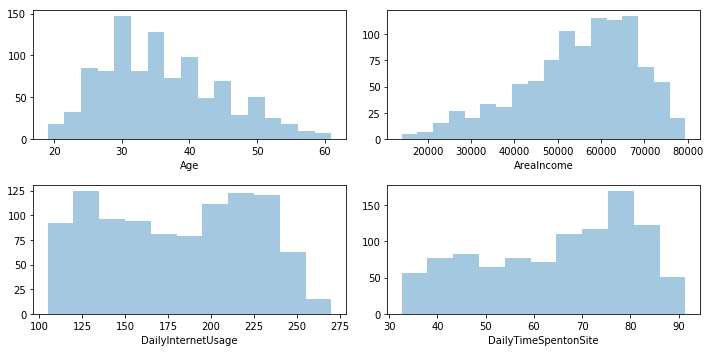

In [ ]:
# 7.2 Using for loop to plot all at once
columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']

# 7.2.1
fig,ax = plt.subplots(2,2, figsize = (10,5))

# 7.2.2
ax = ax.flatten()

# 7.2.3
for i in range(len(columns)):
    _ = sns.distplot(ad[columns[i]],ax = ax[i], kde = False)
plt.tight_layout()

In [ ]:
# 8.0 Relationship of numeric variable with a categorical variable
# Question 4: How is 'Age' related to clicking?
# Question 5: How is DailyInternetUsage related to clicking?
# Question 6: How is 'AreaIncome' related to clicking?

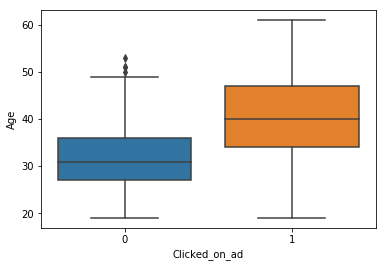

In [ ]:
# 8.1 One demo plot of relationship of 'Age' with 'Clicked_on_ad'
#     https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

_=sns.boxplot(x = 'Clicked_on_ad',       # Discrete
              y = 'Age',                   # Continuous
              data = ad
              )

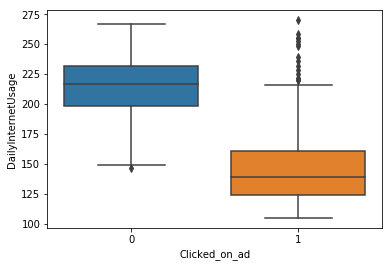

In [ ]:
# 8.2 'DailyInternetUsage'  vs clicking
#     Try: notch = True

_=sns.boxplot(x = 'Clicked_on_ad',         # Discrete
              y = 'DailyInternetUsage',    # Continuous
              data = ad
              )

In [ ]:
# 9.0 Relationship of numeric to numeric variables
#     Using jointplots:
#           While jointplots may not show any linear relationship,
#           they can show by use of contour plots, given X, probable
#           Y through high density areas.

In [ ]:
# Question 7: Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 8: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 9: Show these plots as kernel density as also 'hex' as also
#             draw regression line
#
# A jointplot = Scatterplot + Density plots

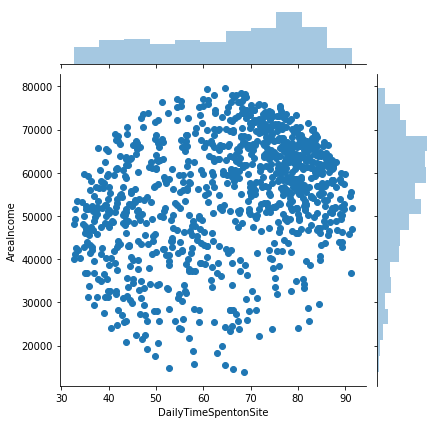

In [ ]:
# 9.1 Open first the following
_ = sns.jointplot(
                   x = 'DailyTimeSpentonSite',
                   y=  'AreaIncome',
                   data = ad
                  )

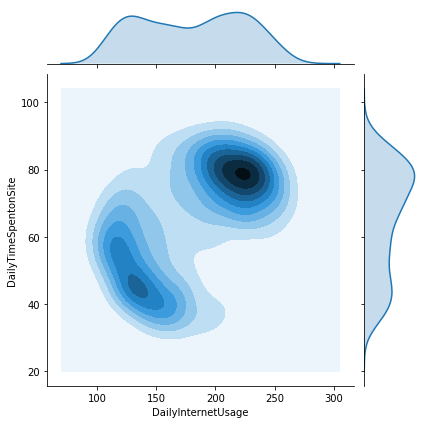

In [ ]:
# 9.2  Clearly two clusters are evident here

_= sns.jointplot(
                 data = ad,
                 x = 'DailyInternetUsage',
                 y = 'DailyTimeSpentonSite',
                 kind = "kde"
                )


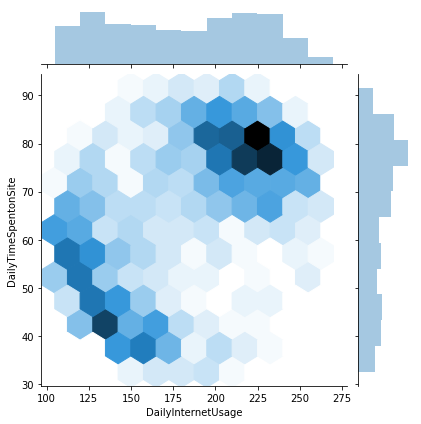

In [ ]:
# 9.3 Or plot hex plot
_= sns.jointplot(
                 data = ad,
                 x = 'DailyInternetUsage',
                 y = 'DailyTimeSpentonSite',
                 kind = "hex"
                )

In [ ]:
# 10.0 Relationship between two categorical and one numeric variable
#     Numeric variable has to be some summary measure. So, we have
#     to first calculate this summary measure
#
#     Matrix plots or heatmap
#    #########################

# Question 13: Hour and weekday wise when are clicks most
# Question 14: Quarter wise and weekday wise when are clicks most
# Question 15: Quarter wise and weekday wise when are DailyInternetUsage max and min

In [ ]:
# 10.1 When are total clicks more
#      Heatmap of hour vs weekday
#      X and Y labels are DataFrame indexes

df_wh = pd.crosstab(ad['hourOfDay'], ad['weekday'])
df_wh

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hourOfDay,,,,,,,
earlymorning,46,35,31,46,38,32,52
morning,42,43,35,37,28,35,35
afternoon,30,18,37,32,28,26,29
evening,20,20,13,16,20,17,24
night,15,19,4,17,18,8,10
latenight,2,5,6,11,10,4,6


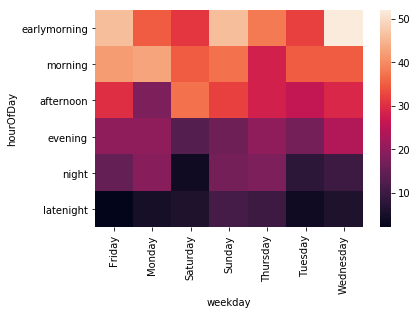

In [ ]:
# 10.2 Draw quickly the heatmap. For drawing heatmap,
#     When Pandas DataFrame is provided, the index & column
#     of DataFrame will be used to label the columns and rows
#      of heatmap.
#
_= sns.heatmap(df_wh)

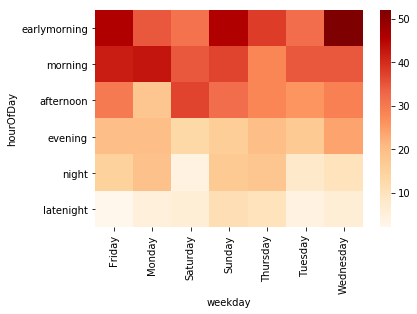

In [ ]:
# 10.2.1 For list of ready-made cmaps (plt.cm...), see:
#        https://matplotlib.org/tutorials/colors/colormaps.html
_=sns.heatmap(df_wh, cmap = plt.cm.OrRd)
#_=sns.heatmap(df_wh, cmap = plt.cm.GnBu)

In [ ]:
############# I am done ###############

In [ ]:
# 11.0 Faceted plots: Show facets of relationships between
#      by numerous categorical variables
#      Facet plots
#      READ 'catplot' AS CONDITIONAL PLOTS


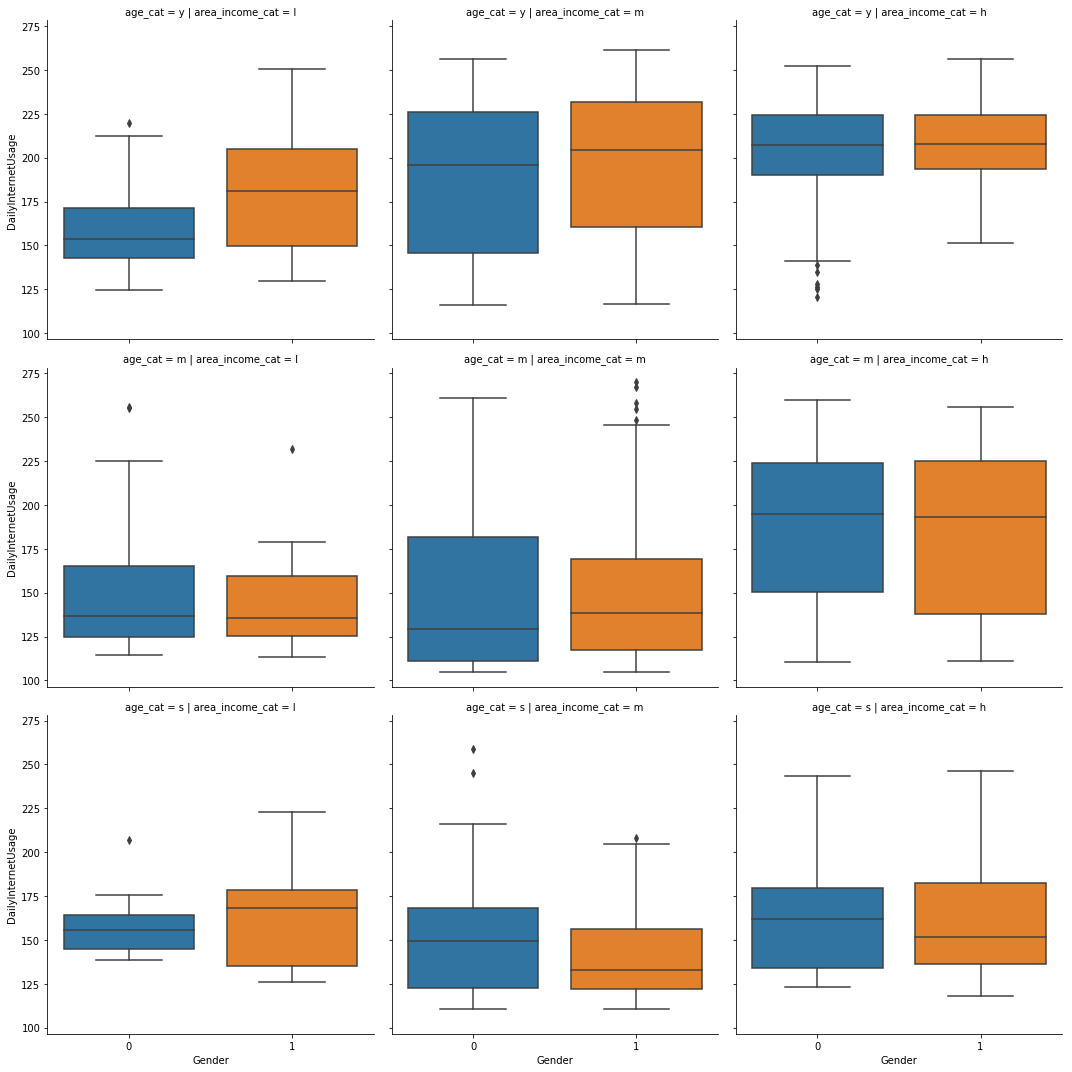

In [ ]:
# 11.1
_=sns.catplot(x = 'Gender',
              y = 'DailyInternetUsage',
              row = 'age_cat' ,
              col = 'area_income_cat',
              kind = 'box',
              estimator = np.sum,
              data = ad
             )

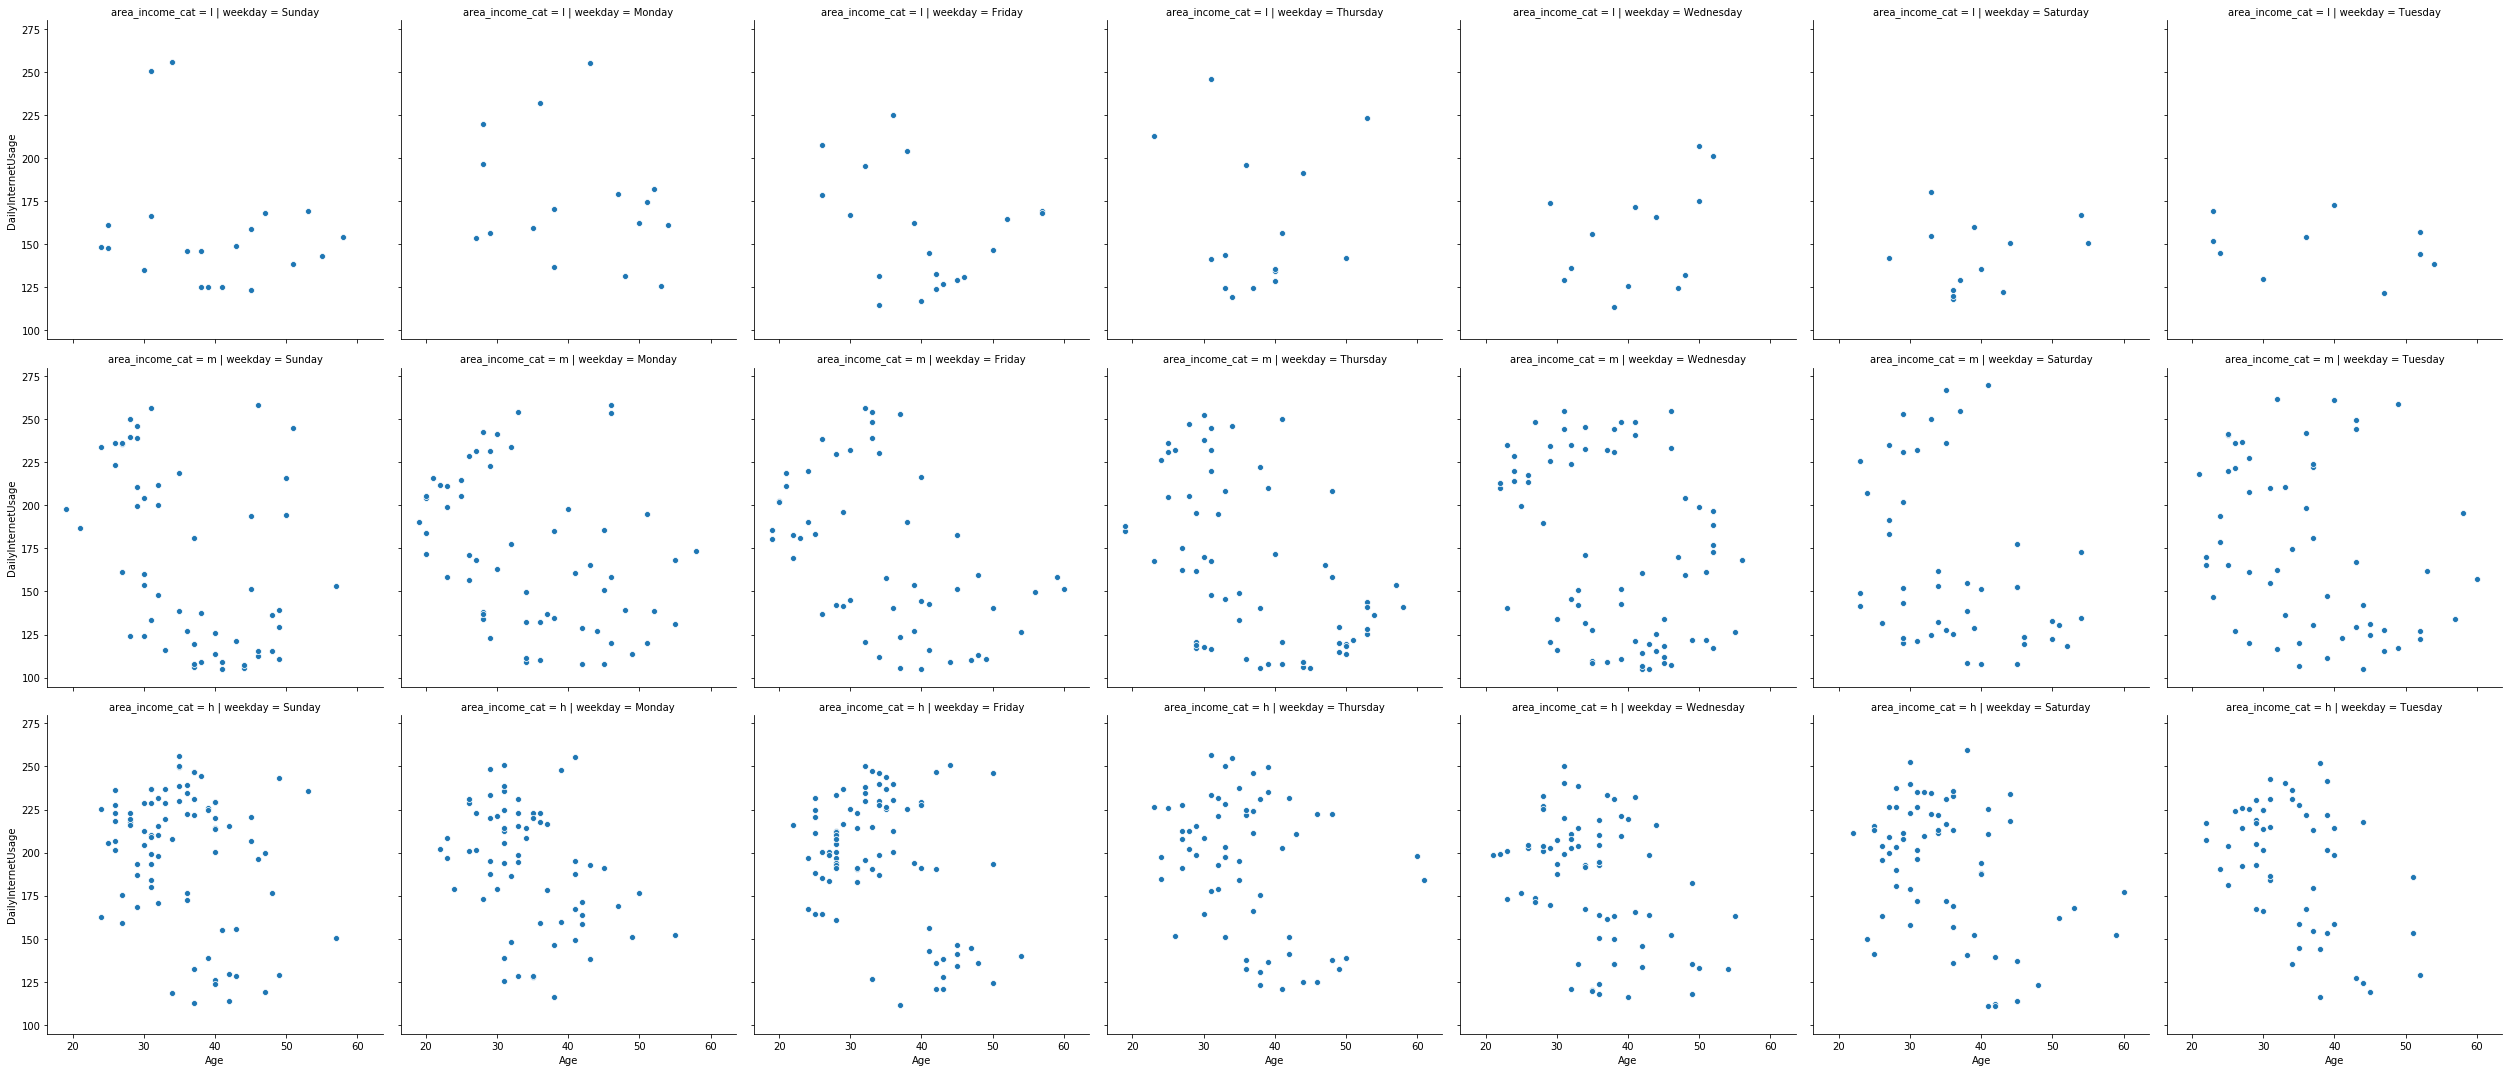

In [ ]:
# 11.2 Faceted scatter plots or relationship plots
_= sns.relplot(
                x = 'Age',
                y = 'DailyInternetUsage',
                row = 'area_income_cat',
                col = 'weekday',
                kind = 'scatter',
                data = ad
)


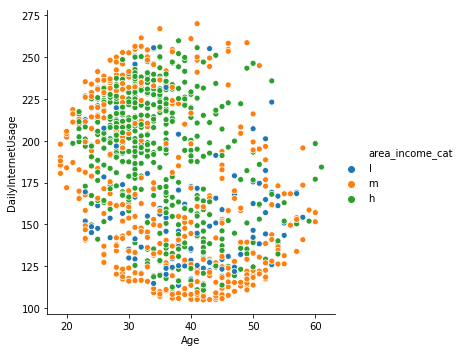

In [ ]:
# 11.3
sns.relplot(x = 'Age',
            y = 'DailyInternetUsage',
            hue = 'area_income_cat',
            kind = 'scatter',
            data = ad,
            cmap = 'winter')

In [ ]:
#############